# Bi-clustering -- Sebastien Le clec'h

From the paper:
"A novel spatio-temporal clustering technique to study the bike sharing system in Lyon."
By Galvani M., Torti A., Menafoglio A., Vantini S.

Workshop Proceedings of the EDBT/ICDT 2020 (http://ceur-ws.org/Vol-2578/BMDA6.pdf)

WARNING: compared to original paper, the data set used is from Brussels city. Not from Lyon city.


# 1. Get the data set (in bash)

WARNING: This part must not be run if you want to use the same dataset as in this project. You can directly jump to section 2.

### Method:
1- Define your path and file name in the bash script get_villo_data.sh

2- Make sure that CURL and Python modules (json, csv, time, datetime) are installed.

3- Using crontab, run every hour the bash script get_villo_data.sh.  

4- After 7 full days, stop the crontab.

### Outputs:
The folder Villo/csv_data will contains a CVS file by hour including informations of all the bike stations.

The folder Villo/json_data will contains the original JSON files from the API requests.

Log_book file keep track of the error occuring during the crontab execution. 

# 2. Create the CSV file for each bike stations (in Python)

This step can be run after to have obtain the complete data set from :

    - API resquest (see section 1)
    or
    - Download the folder from this link.  

### If you don't run this step to produce the matrix, you can use the one in the folder Matrix_data. Then use the script biclustering_Algorithm_leclech.py in the Scripts folder.

## Method:
step 1- Create the list of the file name from the API request or the download folder.

step 2- Loop over the list name to create for each bike stations a CSV file extracting from hourly report file the variables: 'time', 'bike_stands', 'avail_bike', 'avail_stands', 'status', 'name'

--> Step 2 could takes time, depending on your computer performance.

step 3- Check that each station belong to a CSV file.

step 4- Compute for each bike station the loading profile over the 24 hourly value, then transform to continuous data using the kernel density function. Clean the station which have no value. The list of avail station is define in the variable list_station.

step 5- Create the initial big matrix as defined in the paper: rows= bike stations; columns= kde loading profile.

step 6- Save the created format to be read outside of Python.

step 7- Plot some loading profile examples


# 3. Run the Bi-clustering Cheng and Church algorithm

## Use the script biclustering_Algorithm_leclech.py in the Scripts folder.


In [1]:
# Import python modules
import os
from os import listdir
import os.path
import glob
import pandas as pd
import math
import numpy as np
import datetime
from sklearn.neighbors import KernelDensity

%matplotlib inline
import matplotlib.pyplot as plt

# Define the folder where are the hourly CSV files from the API request.
source_dir = '${MYPATH}/Villo/csv_data/'

In [2]:
############
## STEP 1 ##
############

# Get the list of all the files name of the data set.
nb_files = 0
list_files = []
for file in glob.glob(source_dir+"*.csv"):
        nb_files = nb_files+1
        list_files.append(file)
list_files = sorted(list_files)
if nb_files > 0 :
       print(nb_files,'CSV files are present')
else:
        print('[ERROR] Make sure that you have select the correct path or download the data set') 

378 CSV files are present


In [228]:
############
## STEP 2 ##
############

#########################################
## WARNING THIS LOOP TAKES TIME TO RUN ##
#########################################

# Compute the variables used in this project for each of the bike stations report and save them as a new csv file.
list_files = sorted(list_files)
nb = 0
# Loop over all the file list defined previously
for files in list_files :
    nb=nb+1
    print((nb*100)/len(list_files),'%', nb, files[62:73]) 
    # Read the hourly report CSV file
    df = pd.read_csv(files,error_bad_lines=False, sep=',')
    # Loop over all the bike station numbers:
    for nb_station in range(1,364):
        station_file_name = 'Villo_'+str(nb_station)+'.csv'
        df_station = df.loc[df['number'] == nb_station]
        data = {'time' : df_station['last_update'],
            'bike_stands': df_station['bike_stands'],
            'avail_bike' : df_station['available_bikes'],
            'avail_stands' : df_station['available_bike_stands'],
            'status'     : df_station['status'],
            'name'      : df_station['name']}
        # Save the variables in a new csv file if not existing, else append to the existing one.
        if os.path.exists(source_dir+'/by_station/'+station_file_name) == False:
            df_small = pd.DataFrame(data, columns = ['time', 'bike_stands', 'avail_bike', 'avail_stands', 'status', 'name'])
            df_small.to_csv(source_dir+'/by_station/'+station_file_name, sep=',', header=True, index=False)
        else:
            df_small = pd.DataFrame(data, columns = ['time', 'bike_stands', 'avail_bike', 'avail_stands', 'status', 'name'])
            df_small.to_csv(source_dir+'/by_station/'+station_file_name, sep=',', mode='a', header=False, index=False)
        

0.5952380952380952 % 1 04-06_00-01
1.1904761904761905 % 2 04-06_01-01
1.7857142857142858 % 3 04-06_02-01
2.380952380952381 % 4 04-06_03-01
2.9761904761904763 % 5 04-06_04-01
3.5714285714285716 % 6 04-06_05-01
4.166666666666667 % 7 04-06_06-01
4.761904761904762 % 8 04-06_07-01
5.357142857142857 % 9 04-06_08-01
5.9523809523809526 % 10 04-06_09-01
6.5476190476190474 % 11 04-06_10-01
7.142857142857143 % 12 04-06_11-01
7.738095238095238 % 13 04-06_12-01
8.333333333333334 % 14 04-06_13-01
8.928571428571429 % 15 04-06_14-01
9.523809523809524 % 16 04-06_15-01
10.119047619047619 % 17 04-06_16-01
10.714285714285714 % 18 04-06_17-01
11.30952380952381 % 19 04-06_18-01
11.904761904761905 % 20 04-06_19-01
12.5 % 21 04-06_20-01
13.095238095238095 % 22 04-06_21-01
13.69047619047619 % 23 04-06_22-01
14.285714285714286 % 24 04-06_23-01
14.880952380952381 % 25 04-07_00-01
15.476190476190476 % 26 04-07_01-01
16.071428571428573 % 27 04-07_02-01
16.666666666666668 % 28 04-07_03-01
17.261904761904763 % 29 04

In [3]:
############
## STEP 3 ##
############

# Count the number of files.
total_csv_file = !find {source_dir}../by_station/*.csv -type f | wc -l  
if int(total_csv_file[0]) == 363 :
         print(total_csv_file[0],' CSV files are present')
else:
         print('[ERROR] Make sure that you have select the correct path or download the data set')

     363  CSV files are present


In [104]:
############
## STEP 4 ##
############

# Define empty dictionnaries, arrays and initial value
df_day = {}
df_bikes = {}
df_wday = {}
training_set_kde = {}
training_set_spline = {}
bikes_set = {}
timing_set = {}
list_nostation = []
list_station = []
count = 0
# Define time step of the bike reports
hours_added = datetime.timedelta(hours = 24)
# Loop over all the Bike Stations
for Bk in range(1,364):
    # Define sub dictionnaries with name set to the bike station number
    training_set_kde[Bk] = {}
    training_set_spline[Bk] = {}
    bikes_set[Bk] = {}
    timing_set[Bk] = {}
    # open the bike station CSV file
    files = '${MYPATH}/by_station/Villo_%s.csv' % (str(Bk))
    df = pd.read_csv(files,error_bad_lines=False, sep=',')
    # Define the column time as timestamp in ms.
    df['time'] = pd.to_datetime(df['time'], unit='ms')
    # Loop over the selected calendar day
    for i in ['12' ,'13', '14', '15', '16', '17', '18', '19'] : 
        # Define the start hour of the day
        start_date = '2021-04-%s 00:30:01' % (i)
        # Define the end of the day
        end_date = datetime.datetime.strptime(start_date, '%Y-%m-%d %H:%M:%S') + hours_added
        # Mask the value outstide the defined timing
        mask = (df['time'] > start_date) & (df['time'] <= end_date)
        df_day[count] = df.loc[mask]
        # Reduce the timing zone to always get 1 value by hour (i.e. 24 values by day)
        start_date = '2021-04-%s 01:00:01' % (i)
        mask2 = (df_day[count]['time'] < start_date)
        load_start = df_day[count].loc[mask2]
        end_date = '2021-04-%s 23:00:01' % (i)
        mask2 = (df_day[count]['time'] > end_date)
        load_end = df_day[count].loc[mask2]
        # Create the bike loading value
        df_bikes[count] = (df_day[count]['avail_bike'] / df_day[count]['bike_stands'])
        # comvert the timestamp in readable format
        df_wday[count] = datetime.datetime.strptime(start_date, '%Y-%m-%d %H:%M:%S').strftime('%A')
        # If there is no 24 value for the bike station, go to next bike station.
        if len(df_day[count]) != 24 :
            #print('For villo',Bk, datetime.datetime.strptime(start_date, '%Y-%m-%d %H:%M:%S').strftime('%d-%m'))
            list_nostation.append(Bk)
            break
        # Go from finit hourly data to continuous data using:
        ####  Kernel density function
        X = np.array(df_bikes[count]).reshape(-1, 1)
        kde = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(X)
        #### Spline smoothing
        x_grid = np.linspace(0, 24, 24)
        s = interpolate.InterpolatedUnivariateSpline(x_grid,df_bikes[count],k=1)
        # Define matrix with kde function for each day (i) and each station (j)
        training_set_kde[Bk][i] = kde
        training_set_spline[Bk][i] = s
        bikes_set[Bk][i] = df_bikes[count]
        timing_set[Bk][i] = df_wday[count]
        count = count+1
    try :
        # Remove the 12th April values
        del training_set_kde[Bk]['12']
        list_station.append(Bk)
    except KeyError:
        print(f'Station {Bk} is missing')
    
# Remove ghost station        
# for i in list_nostation :
#         del training_set_kde[i]
#         del training_set_spline[i]
#         del bikes_set[i]


Station 29 is missing
Station 35 is missing
Station 60 is missing
Station 103 is missing
Station 104 is missing
Station 129 is missing
Station 162 is missing
Station 195 is missing
Station 197 is missing
Station 204 is missing
Station 210 is missing
Station 225 is missing
Station 302 is missing
Station 316 is missing
Station 361 is missing
Station 363 is missing


In [105]:
############
## STEP 5 ##
############

# Create the initial big matrix as defined in the paper: rows= bike station; columns=loading profile
# Numbers of elememnt for the loading profile
nb = 240
X_plot_kde = np.linspace(0, 1, nb)[:, np.newaxis]
X_plot_spline = np.linspace(0, 24, nb)
j = -1
MatrixA_kde = np.zeros((len(training_set_kde),7,nb))
MatrixA_spline = np.zeros((len(training_set_spline),7,nb))
MatrixBike = np.zeros((len(training_set_kde),7,24))
for station in range(0,len(list_station)) :
    j = -1 
    for day in ['13', '14', '15', '16', '17', '18', '19'] :
        j = j+1
        # Save daily kde function with 240 data points element in a matrix
        log_dens = training_set_kde[list_station[station]][day].score_samples(X_plot_kde)
        MatrixA_kde[station,j,:] = np.exp(log_dens)
        if MatrixA_kde[station,j,:].sum() == 0 :
            print('ERROR for station',station,'on day',day)
        # Save daily spline function with 240 data points element in a matrix
        f_spline = interpolate.InterpolatedUnivariateSpline(x_grid,bikes_set[list_station[station]][day],k=5)
        MatrixA_spline[station,j,:] = f_spline(X_plot_spline)
        # Save daily bike station loading profile element in a matrix
        MatrixBike[station,j,:] = bikes_set[list_station[station]][day]


In [86]:
############
## STEP 6 ##
############

# save daily kde function with 240 data points element in a file to be read by R
np.save("Matrix_data/MatrixBike_kde_leclech.npy", MatrixA_kde)
np.save("Matrix_data/MatrixBike_spline_leclech.npy", MatrixA_spline)

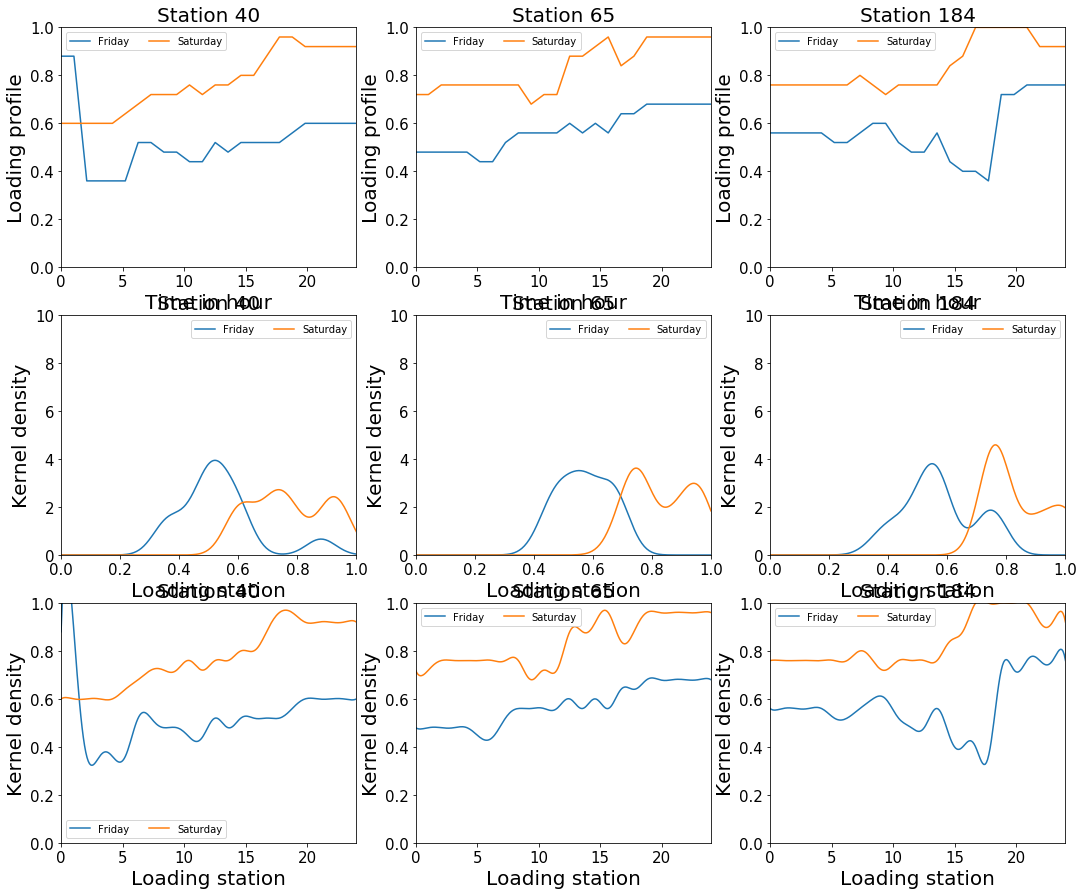

In [110]:
############
## STEP 7 ##
############

# Define the grid
x_grid = np.linspace(0, 24, 24)
X_plot_kde = np.linspace(0, 1, 240)[:, np.newaxis]
X_plot_spline = np.linspace(0, 24, 240)
# Define fig size
fig, axs = plt.subplots(3, 3,figsize=(18,15))
fplt_col = 0
fplt_row = 0
# list of the day name for the label
list_days = [ '13', '14','15','16', '17', '18', '19']
# Define the stations to plot (max 3)
list_station_plot = [37,61,176]
# Define the days to plot
list_day_plot = [3,4]
# Loop between the station and the day
for station_nb in list_station_plot :
    for i in list_day_plot :
        day_t = list_days[i]
        axs[fplt_row, fplt_col].plot(x_grid,MatrixBike[station_nb][i],label=timing_set[1][day_t],)
    axs[fplt_row, fplt_col].set_xlim(0, 24)
    axs[fplt_row, fplt_col].set_ylim(0,1)
    axs[fplt_row, fplt_col].set_title("Station %s" %(str(list_station[station_nb])), fontsize=20)
    axs[fplt_row, fplt_col].set_xlabel("Time in hour", fontsize=20)
    axs[fplt_row, fplt_col].set_ylabel("Loading profile", fontsize=20)
    axs[fplt_row, fplt_col].tick_params(axis='y',labelsize=15)
    axs[fplt_row, fplt_col].tick_params(axis='x',labelsize=15)
    axs[fplt_row, fplt_col].legend(ncol=2)
    fplt_col = fplt_col+1
fplt_row = fplt_row+1
fplt_col = 0
for station_nb in list_station_plot :
    for i in list_day_plot :
        day_t = list_days[i]
        #log_dens = training_set_kde[station_nb][i].score_samples(X_plot_kde) np.exp(log_dens)
        axs[fplt_row, fplt_col].plot(X_plot_kde[:, 0],MatrixA_kde[station_nb,i,:] ,label=timing_set[1][day_t])    
    axs[fplt_row, fplt_col].set_xlim(0, 1)
    axs[fplt_row, fplt_col].set_ylim(0,10)
    axs[fplt_row, fplt_col].set_title("Station %s" %(str(list_station[station_nb])), fontsize=20)
    axs[fplt_row, fplt_col].set_xlabel("Loading station", fontsize=20)
    axs[fplt_row, fplt_col].set_ylabel("Kernel density", fontsize=20)
    axs[fplt_row, fplt_col].tick_params(axis='y',labelsize=15)
    axs[fplt_row, fplt_col].tick_params(axis='x',labelsize=15)
    axs[fplt_row, fplt_col].legend(ncol=2)
    fplt_col = fplt_col+1
fplt_row = fplt_row+1
fplt_col = 0
for station_nb in list_station_plot :    
    for i in list_day_plot :
        day_t = list_days[i]
        #s = interpolate.InterpolatedUnivariateSpline(x_grid,bikes_set[station_nb][i],k=5)
        axs[fplt_row, fplt_col].plot(X_plot_spline,MatrixA_spline[station_nb,i,:],label=timing_set[1][day_t])     
    axs[fplt_row, fplt_col].set_xlim(0, 24)
    axs[fplt_row, fplt_col].set_ylim(0,1)
    axs[fplt_row, fplt_col].set_title("Station %s" %(str(list_station[station_nb])), fontsize=20)
    axs[fplt_row, fplt_col].set_xlabel("Loading station", fontsize=20)
    axs[fplt_row, fplt_col].set_ylabel("Kernel density", fontsize=20)
    axs[fplt_row, fplt_col].tick_params(axis='y',labelsize=15)
    axs[fplt_row, fplt_col].tick_params(axis='x',labelsize=15)
    axs[fplt_row, fplt_col].legend(ncol=2)
    fplt_col = fplt_col+1

